# Introduction

In [2]:
import seaborn as sns
%matplotlib inline

# Distribution Plots

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### distplot

In [4]:
#plot a univariate distribution of observations

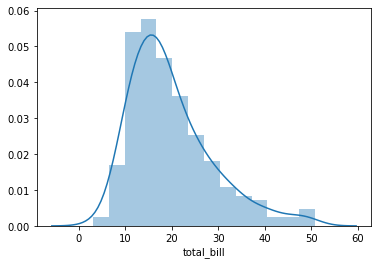

In [7]:
sns.distplot(tips['total_bill']) #plotting the total_bill column from the tips df
#produces a histrogram and a kde line

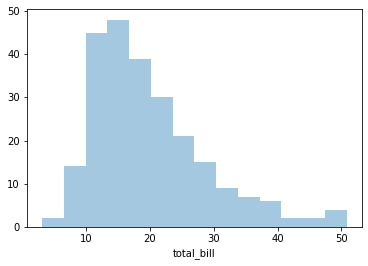

In [8]:
sns.distplot(tips['total_bill'],kde=False)  #removing the kde line

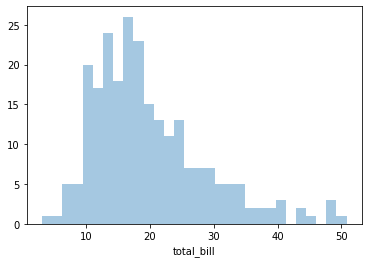

In [9]:
sns.distplot(tips['total_bill'],kde=False, bins = 30)  #add more bins

#### jointplot

In [10]:
#allows you to join 2 dist plots for bivariate data

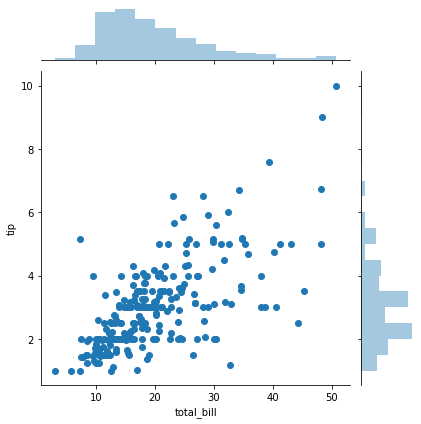

In [11]:
sns.jointplot(x = 'total_bill', y= 'tip', data= tips)
#retuns the 2 distplots for 'total_bill' and 'tip' with a scatter plot of the 2 datasets joined.

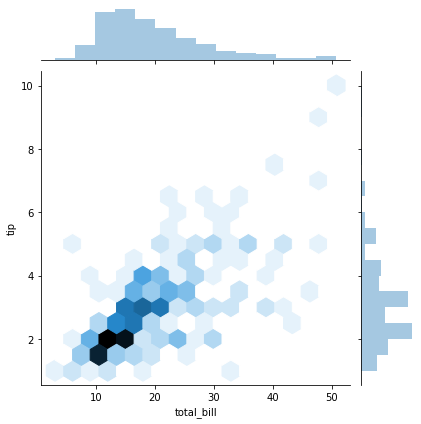

In [12]:
sns.jointplot(x = 'total_bill', y= 'tip', data= tips,kind = 'hex')
#returns the 2 distplots and a hex plot, rather than a scatterplot

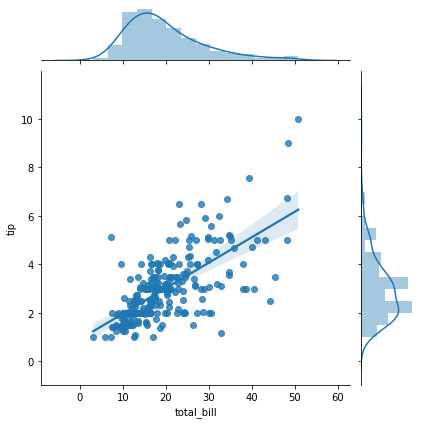

In [13]:
sns.jointplot(x = 'total_bill', y= 'tip', data= tips,kind = 'reg')

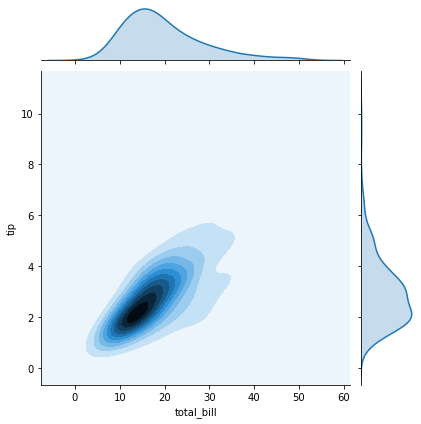

In [15]:
sns.jointplot(x = 'total_bill', y= 'tip', data= tips,kind = 'kde')
#creates the 2 distplots and adds a 2d density plot where the datapoints line up the most.

#### pairplot

In [17]:
#plot pairwise relationships over an entire dataframe

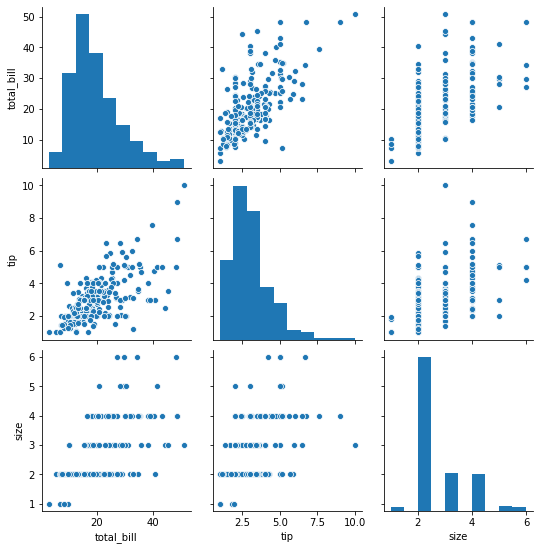

In [18]:
sns.pairplot(data = tips)
#does the jointplot for every single combination of columns

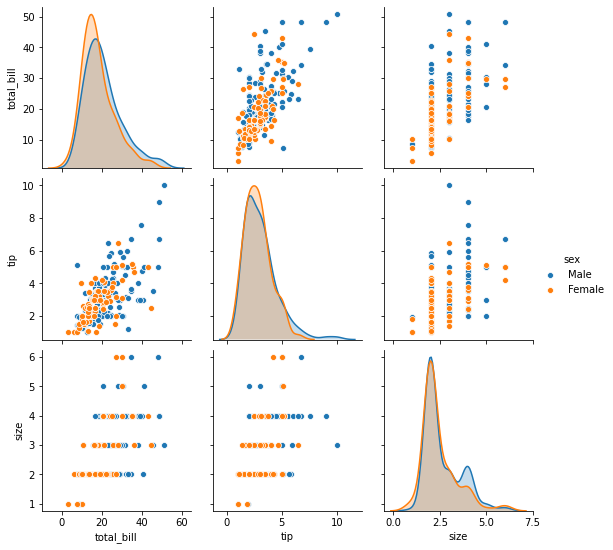

In [19]:
sns.pairplot(data = tips, hue = 'sex')
#adding the hue argument and passing in the name of a categorical column
#color coded datapoints for the column you put into hue

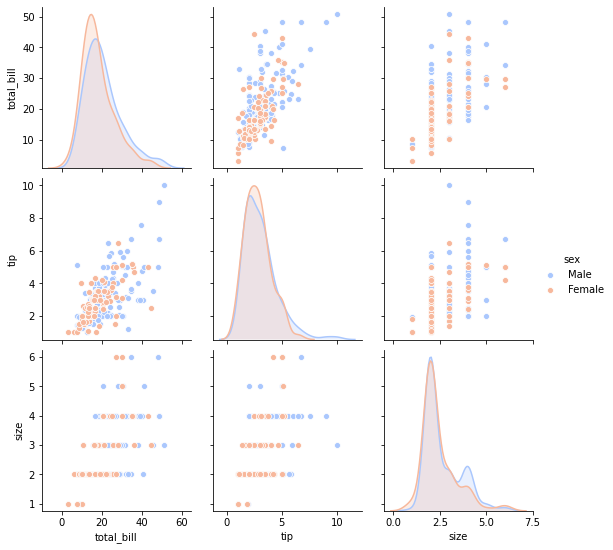

In [21]:
sns.pairplot(data = tips, hue = 'sex', palette = 'coolwarm')
#can also add a pallete in addition to hue

#### rugplot

In [ ]:
# we'll use this to explain what the kde plots we saw earlier are
#draws a dash mark on the bottom for every point on the plot.
#the basis for the displot and the kde plot

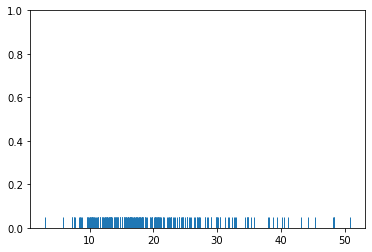

In [22]:
sns.rugplot(tips['total_bill'])
#draws a dash mark on the bottom for every point on the plot.

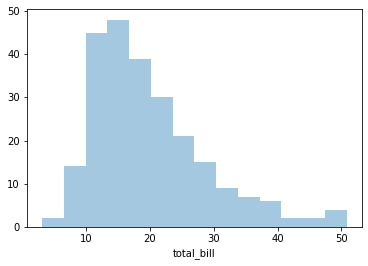

In [23]:
#the distplot makes bins and counts the number in each bin to plot.
sns.distplot(tips['total_bill'],kde=False)

#### How we get the kde line from the rugplot

(0.0, 1.0)

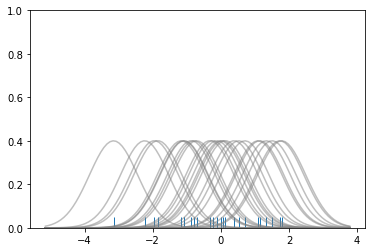

In [26]:
#this really just shows the kde plot that occurs from the rugplot which is used to create the kde line
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

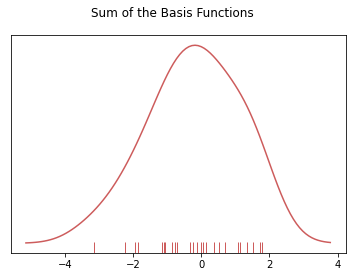

In [27]:
#the graph above creats normal distributions on top of each dash.
#we sum them all up to get the kernal density basis function.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

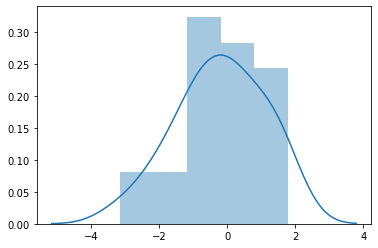

In [29]:
#we can compare the resutls to the displot kde results
sns.distplot(dataset)

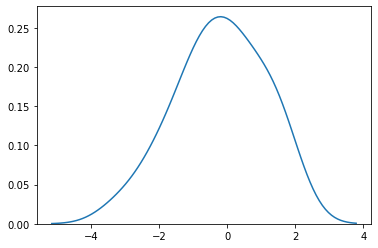

In [30]:
#we can compare the resutls to the displot kde results
sns.kdeplot(dataset)

# Categorical Plots

In [31]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### barplot

In [32]:
#seeing the distribution of a categorical column in relation to a numeric or other categorical column

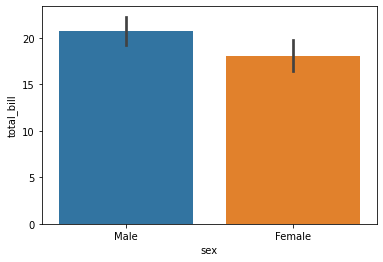

In [33]:
sns.barplot(x = 'sex', y= 'total_bill', data = tips)
#allows you to aggregate some categorical data based off some function (mean by default)
#plots the mean total bill on y based on the categories on x axis
#average total bill for males is slightly higher than average total bill for females

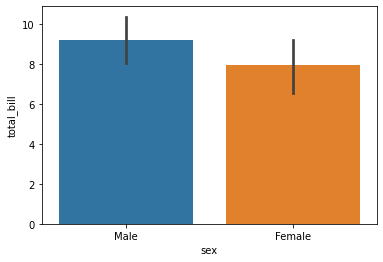

In [37]:
#lets use a different estimator function
import numpy as np
sns.barplot(x = 'sex', y= 'total_bill', data = tips, estimator = np.std)
#returns the standard deviation of total bill for each category

#### countplot

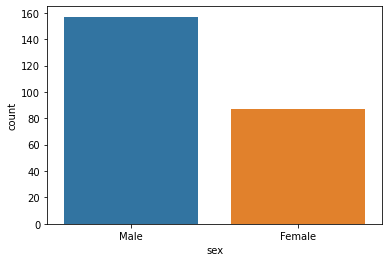

In [39]:
#similar to barplot except the estimator is counting the number of occurances
sns.countplot(x = 'sex',data = tips)
#males occur more frequently in the dataset.

#### boxplot

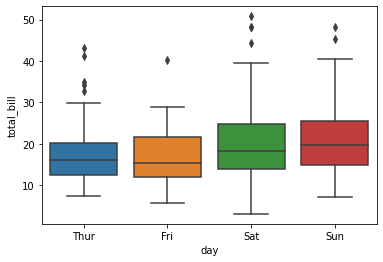

In [42]:
#used to show distribution of categorical data
#shows distribution of quantitative data in a way that hopefully creates comparisons beteween variables
sns.boxplot(x = 'day', y = 'total_bill', data = tips)
#shows quartiles of the dataset while the whiskers show the rest of the distribution
#25% of bills are from bottom of whisker to the bottom of the box,
#25% of bills are from bottom of box to center of box
#25% of bill sare from center of box to top of box
#25% are from top of box to top of whisker
#points outside the whiskers are outliers

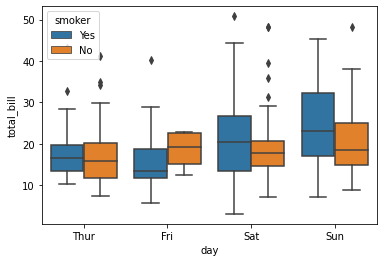

In [43]:
#adding a hue argument will break up the box plot into different categories for each day
sns.boxplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker')
#can no compare day by day behavior for each bill as well as day by day behavior for smokers/nonsmokers for each day.

#### violinplots

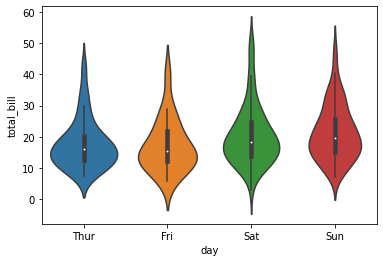

In [44]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips)
# allows us to plot all the actual datapoints.
#really just shows the kernel density estimation of the underlying distribution


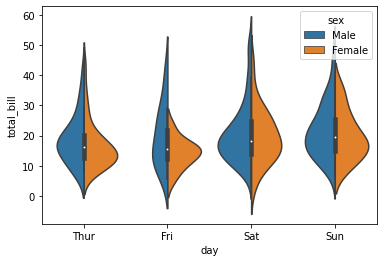

In [46]:
#can also do hue agrument and split each violin according to that hue
sns.violinplot(x = 'day',y = 'total_bill', data = tips, hue = 'sex',split = True)
#allows us to directly compare the density of total bill for male vs female for each day

#### stripplot

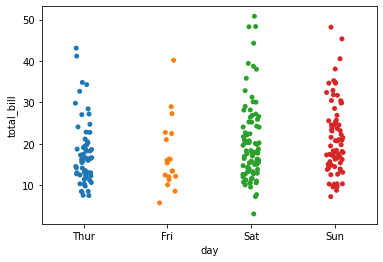

In [48]:
#plots all data for each day in a vertical strip
sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = True)

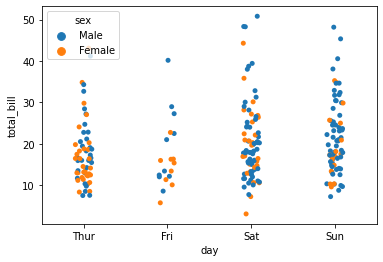

In [49]:
#can also add hue arguments in here, too
sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = True, hue = 'sex')

C:\Users\joelw\anaconda3\envs\DSML_Bootcamp\lib\site-packages\seaborn\categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


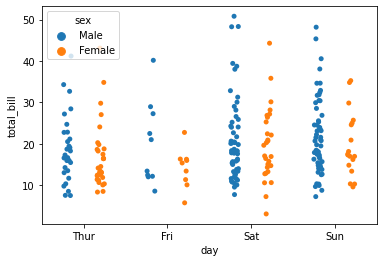

In [50]:
#and a split
sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = True, hue = 'sex', split=True)

#### swarmplot

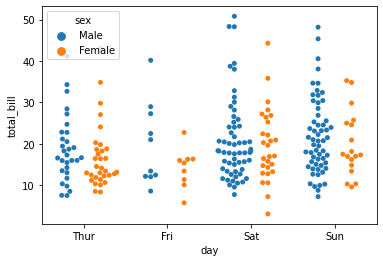

In [54]:
#cross between a stripplot and a violinplot
#points are organized so they don't overplap
sns.swarmplot(x = 'day',y = 'total_bill', data = tips, hue = 'sex', dodge = True)
#dodge is used instead of split in the swarmplot

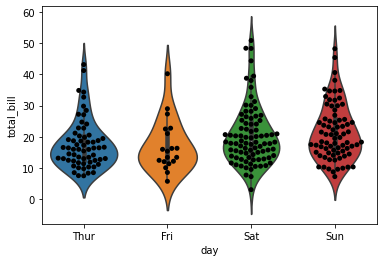

In [56]:
#can plot both swarmplot and violinplot on top of each other
sns.violinplot(x = 'day', y= 'total_bill', data = tips)
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color = 'black')

#### factorplot/catplot

C:\Users\joelw\anaconda3\envs\DSML_Bootcamp\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


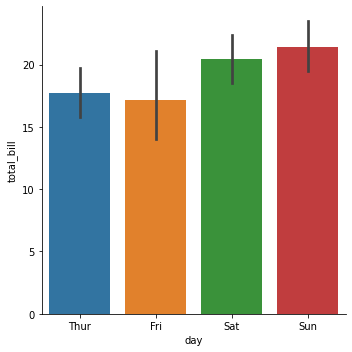

In [59]:
# most generalized way of creating plots
sns.factorplot(x = 'day', y = 'total_bill', data = tips, kind = 'bar')

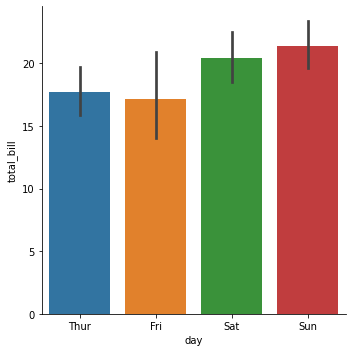

In [60]:
#now called catplot
sns.catplot(x = 'day', y  = 'total_bill', data = tips, kind = 'bar')

# Matrix Plots  (aka heatmaps)

In [62]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head(), flights.head()

(   total_bill   tip     sex smoker  day    time  size
 0       16.99  1.01  Female     No  Sun  Dinner     2
 1       10.34  1.66    Male     No  Sun  Dinner     3
 2       21.01  3.50    Male     No  Sun  Dinner     3
 3       23.68  3.31    Male     No  Sun  Dinner     2
 4       24.59  3.61  Female     No  Sun  Dinner     4,
    year     month  passengers
 0  1949   January         112
 1  1949  February         118
 2  1949     March         132
 3  1949     April         129
 4  1949       May         121)

#### correlation table to create heatmap

In [67]:
#data needs to already be in matrix form before plotting so we'll create a correlation table
tc = tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


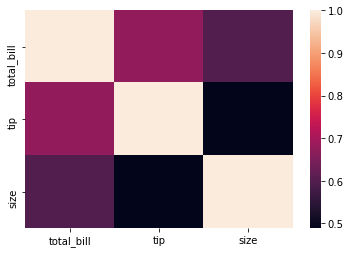

In [68]:
#passes the correlation table (tc) into heatmap to create a heatmap
sns.heatmap(tc)

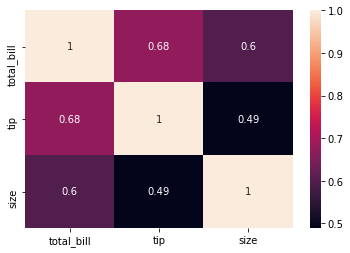

In [69]:
#other arguments include annot = True
sns.heatmap(tc, annot = True)

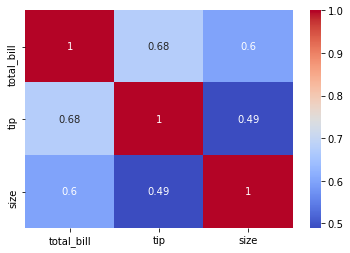

In [70]:
#can also specify colormap using cmap = 
sns.heatmap(tc, annot = True, cmap = 'coolwarm')

#### pivot_table to create heatmap

In [71]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [75]:
#use a pivot table to get a matrix table ordered by months down the left, years across the top, filled in by num passengers
fl = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')
fl.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


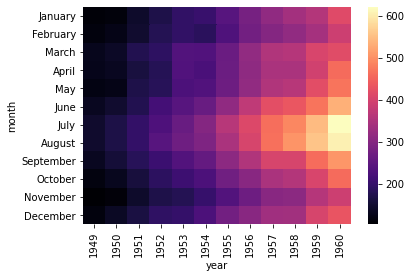

In [79]:
#we'll plot the flights pivot table data as a heatmap
sns.heatmap(fl, cmap = 'magma')
#we can see the hot times to fly. As the years increase there are more flights and during the summer there are more flights

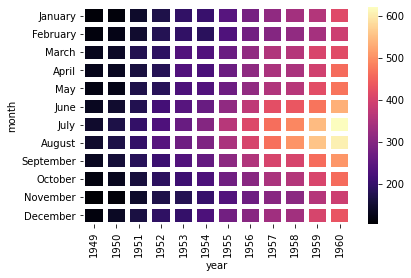

In [82]:
#use linecolor = and linewidth arguments
sns.heatmap(fl, cmap = 'magma', linecolor = 'white', linewidth = 4)

#### cluster map

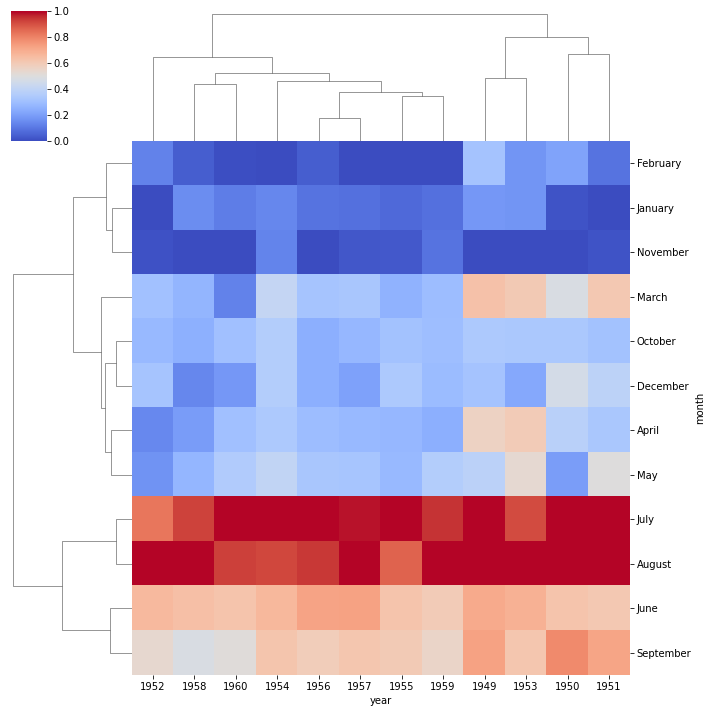

In [86]:
#heirarchical clustering to create this heatmap
sns.clustermap(fl, cmap = 'coolwarm', standard_scale = 1)
#tries to cluster columns and rows together based off their similarity
#years and months are no longer in numeric/alphabetical order. They are moved to be next to months/years that are more similar

In [ ]:
#we'll talk about this again when discussing clustering machine learning algorithms.

# Grids

In [88]:
#use seaborns grids capability to automate subplots based off features in our data.
import seaborn as sns
%matplotlib inline
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [89]:
#there are 3 species of iris in the dataset
iris['species'].unique()
#sertosa, versicolor, and virginica

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### PairGrid

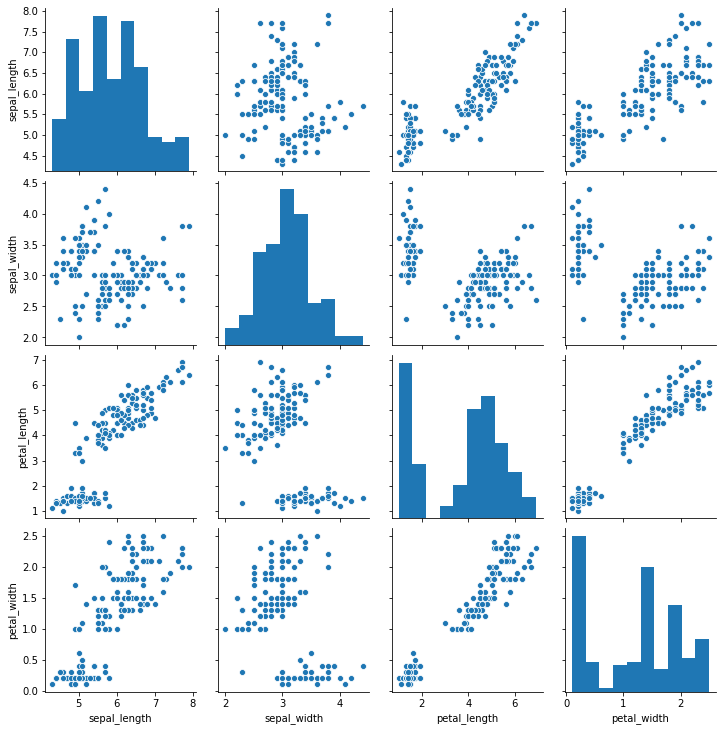

In [90]:
sns.pairplot(data = iris)

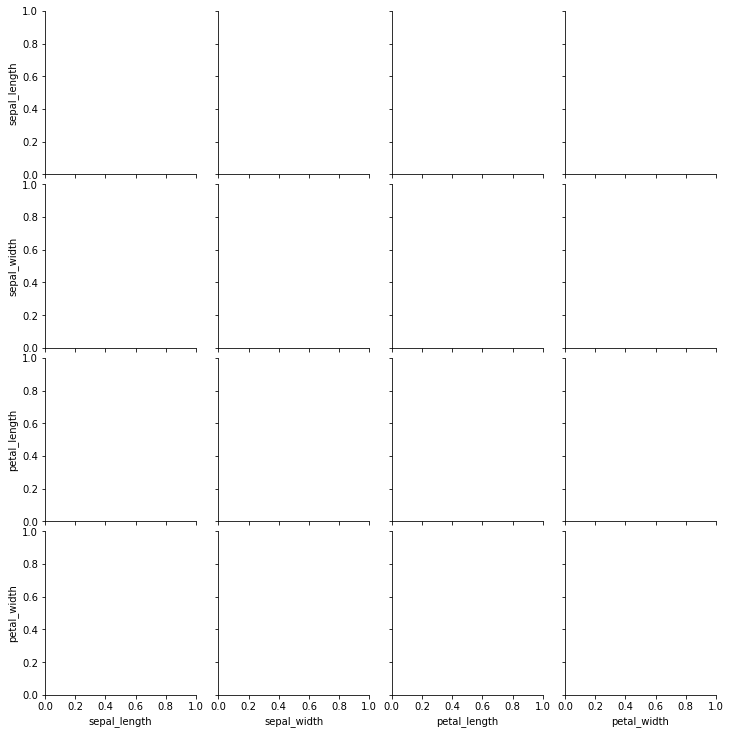

In [91]:
sns.PairGrid(data = iris)

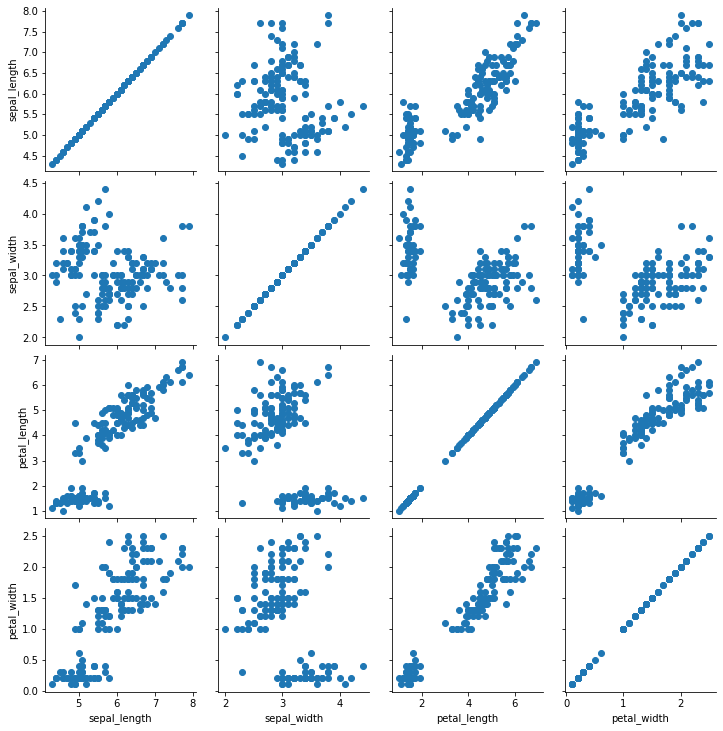

In [92]:
g = sns.PairGrid(data = iris)
g.map(plt.scatter)
#creats scatter plots for all subplots

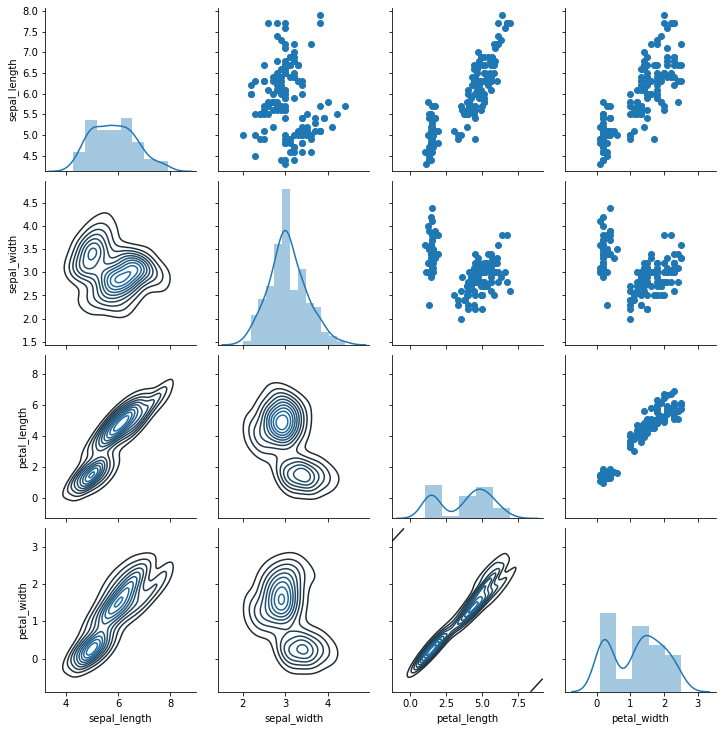

In [93]:
#can give each plot more specific format
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

#### FacetGrid

In [94]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


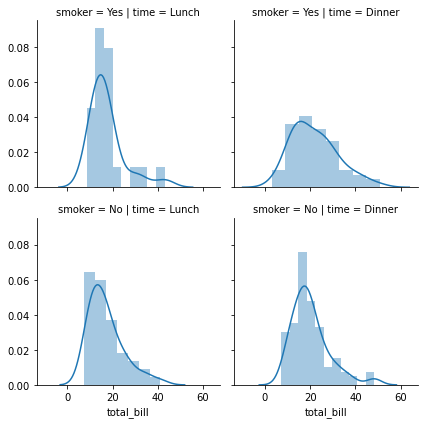

In [96]:
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')
g.map(sns.distplot, 'total_bill')
#returns a distplot of total_bill for each combination of smoker (yes/no) and time (lunch/dinner)

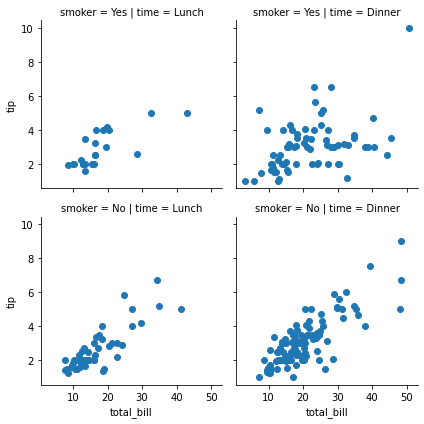

In [98]:
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')
g.map(plt.scatter, 'total_bill', 'tip')
#returns a scatterplot of total_bill vs tip for each combination of smoker (yes/no) and time (lunch/dinner)

# Regression Plots 

In [99]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### lmplot

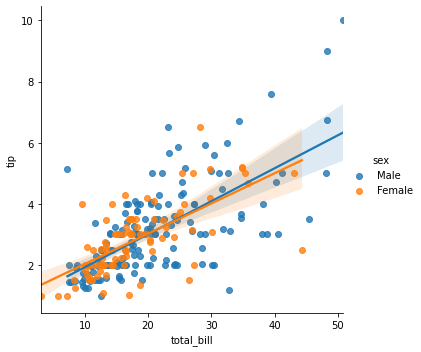

In [101]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex')

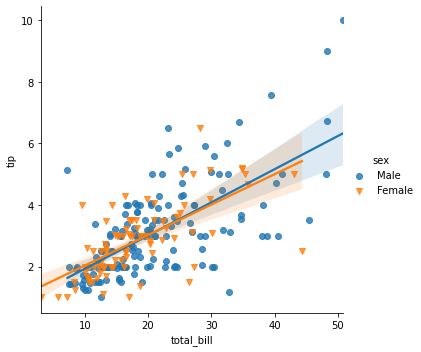

In [102]:
#can start to pass in matplotlib styling arguments 
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o','v'])
#pass in a list of markers since theres 2 hues

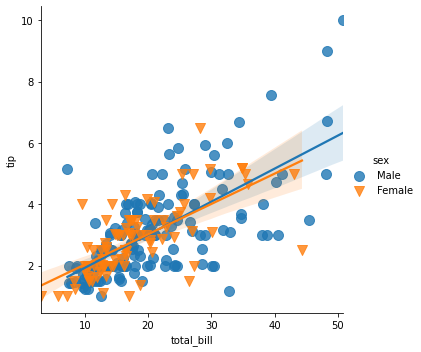

In [103]:
#additionally we can use the scatter_kws argument and pass in a dictionary of params
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o','v'], scatter_kws={'s': 100})
#here we're increasing the size of the markers to 100

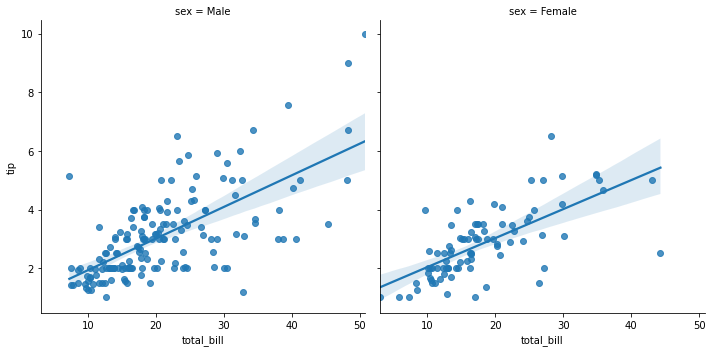

In [104]:
#can use a grid instead of seperating by hue
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'sex')
#now there's 2 different lm plots seperated by sex category.

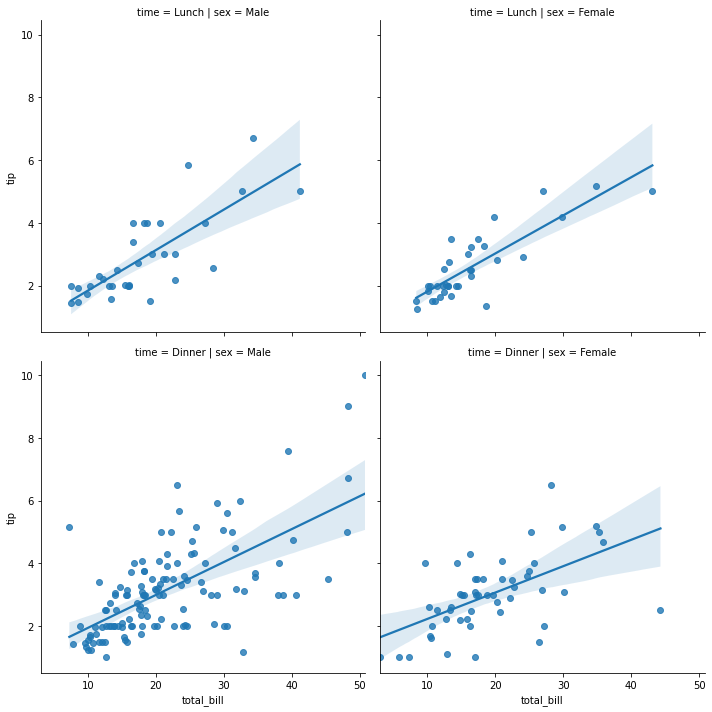

In [105]:
#also works for rows too
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'sex', row  = 'time')
#now we get 4 plots whre the columns are seperate sex values and the rows are seperate time values

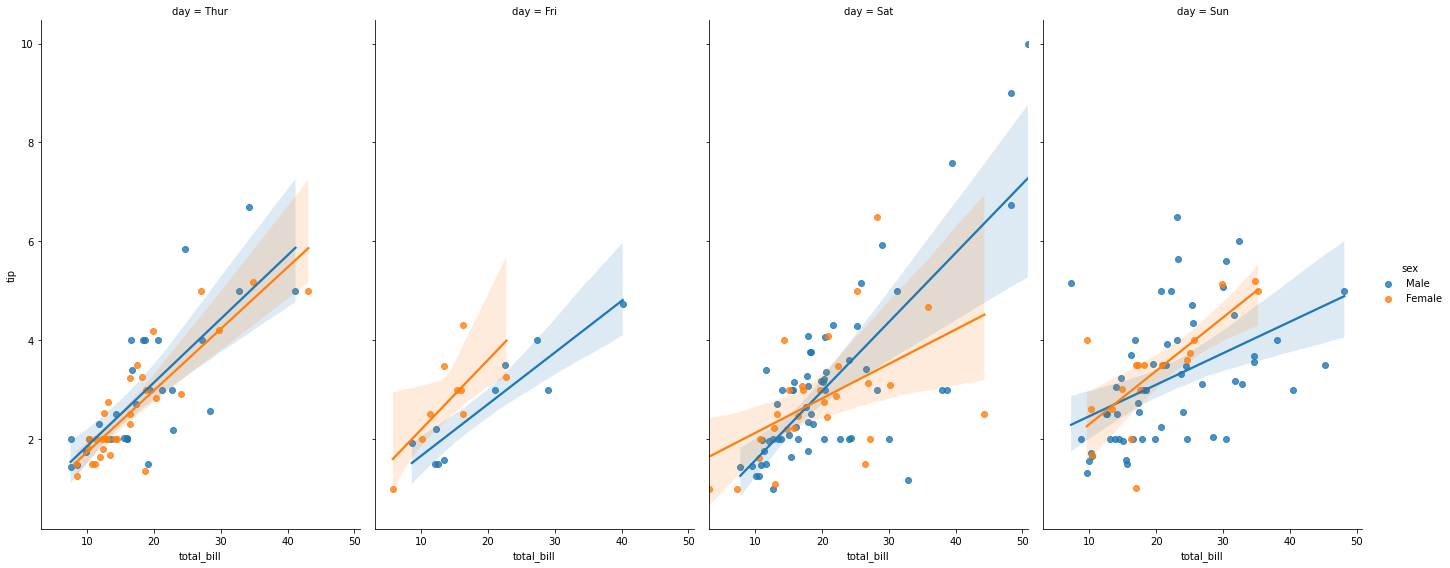

In [107]:
#can adjust size and aspect rations of plots
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', hue = 'sex', aspect = 0.6, height = 8)
#now we have 4 plots that are 8 tall and (8*0.6) wide.  

# Style and Color

In [108]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Setting styles

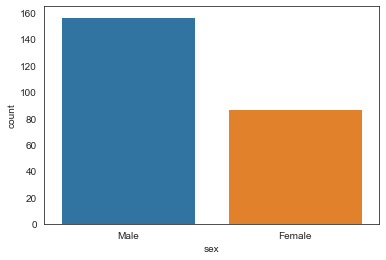

In [110]:
sns.set_style(style = 'white')
sns.countplot(x = 'sex', data = tips)

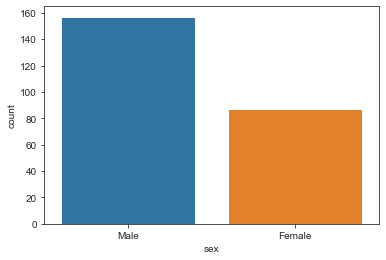

In [111]:
sns.set_style(style = 'ticks')
sns.countplot(x = 'sex', data = tips)

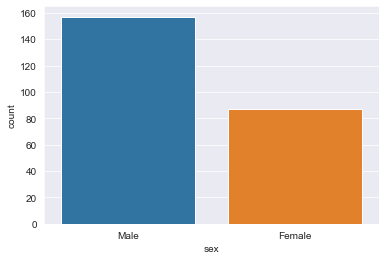

In [112]:
sns.set_style(style = 'darkgrid')
sns.countplot(x = 'sex', data = tips)

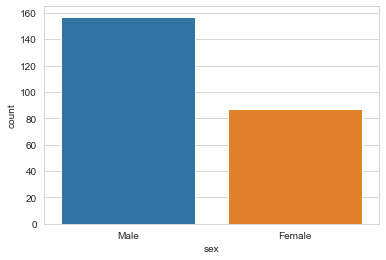

In [113]:
sns.set_style(style = 'whitegrid')
sns.countplot(x = 'sex', data = tips)

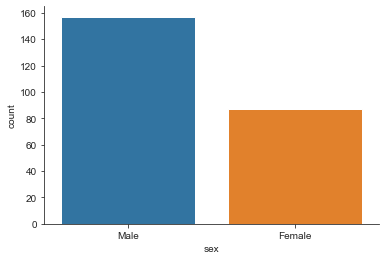

In [114]:
#can remove the top and right spines from the plot using sns.despline()
sns.set_style(style = 'ticks')
sns.countplot(x = 'sex', data = tips)
sns.despine()

#### size and aspect

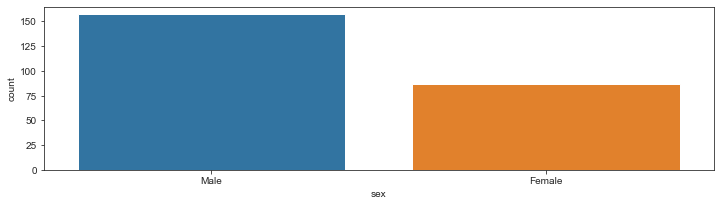

In [116]:
#can use fig = plt.figure(figsize = )
plt.figure(figsize = (12,3))
sns.countplot(x = 'sex', data = tips)

#### scale and context

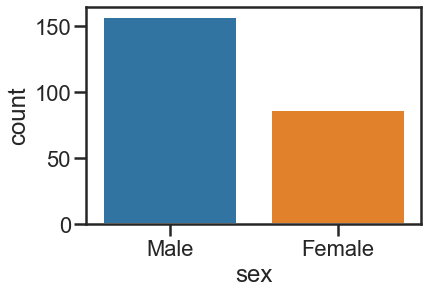

In [121]:
#set_context() allows you to overwrite default params and change font scales
sns.set_context(context = 'poster')
sns.countplot(x = 'sex', data = tips)

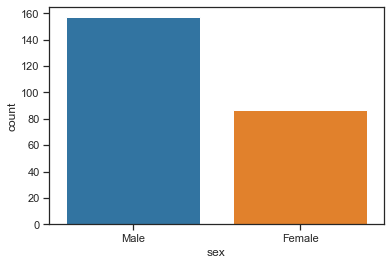

In [122]:
sns.set_context(context = 'notebook')
sns.countplot(x = 'sex', data = tips)

#### Palettes and colors

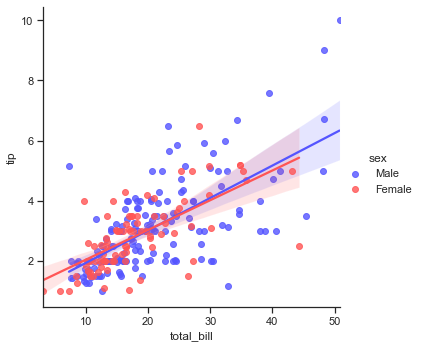

In [126]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', palette = 'seismic')